<a href="https://colab.research.google.com/github/vicente-gonzalez-ruiz/PRMC-experimentos/blob/master/src/shift_invariance_in_OLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Can the LP represented critically?
Not.

In [6]:
%matplotlib inline
from load_and_display import *
#import cv2
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

In [7]:
%%bash

# Create the two images ("/tmp/moving_circle_000.png" and "/tmp/moving_circle_001.png") with a circle
# of diameter 10 that moves from coordinate (20,30) to (21,30).
/home/vruiz/MRVC/tools/moving_circle.sh -w 128 -h 128 -x 20 -y 30 -d 10 -f 2

/home/vruiz/MRVC/tools/moving_circle.sh: parsing: -w 128 -h 128 -x 20 -y 30 -d 10 -f 2
image_width = 128
image_height = 128
Initial X coordinate = 20
Initial Y coordinate = 30
diameter = 10
frames = 2


+ i=0
+ '[' 0 -le 1 ']'
++ printf %03d 0
+ ii=000
+ convert -size 128x128 xc:skyblue -fill white -stroke black -draw 'circle 20,30 30,30' /tmp/moving_circle_000.png
+ i=1
+ '[' 1 -le 1 ']'
++ printf %03d 1
+ ii=001
+ convert -size 128x128 xc:skyblue -fill white -stroke black -draw 'circle 21,30 31,30' /tmp/moving_circle_001.png
+ i=2
+ '[' 2 -le 1 ']'


In [8]:
moving_circle_000 = cv2.imread("/tmp/moving_circle_000.png")

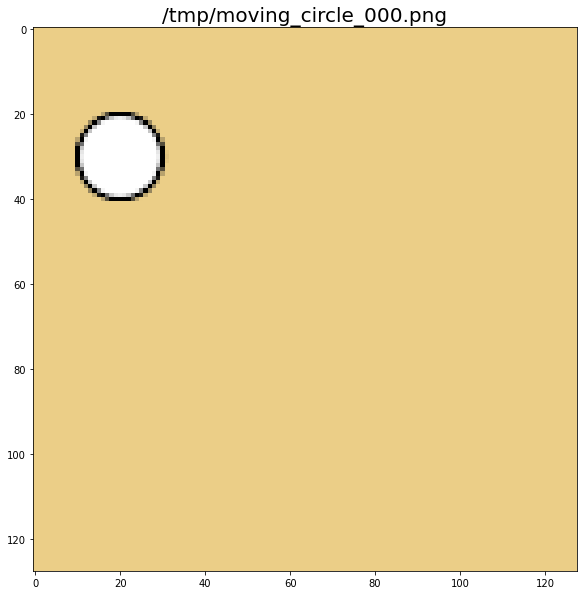

In [9]:
plt.figure(figsize=(10,10))
plt.title("/tmp/moving_circle_000.png", fontsize=20)
plt.imshow(moving_circle_000)

In [10]:
moving_circle_000 = cv2.imread("/tmp/moving_circle_001.png")

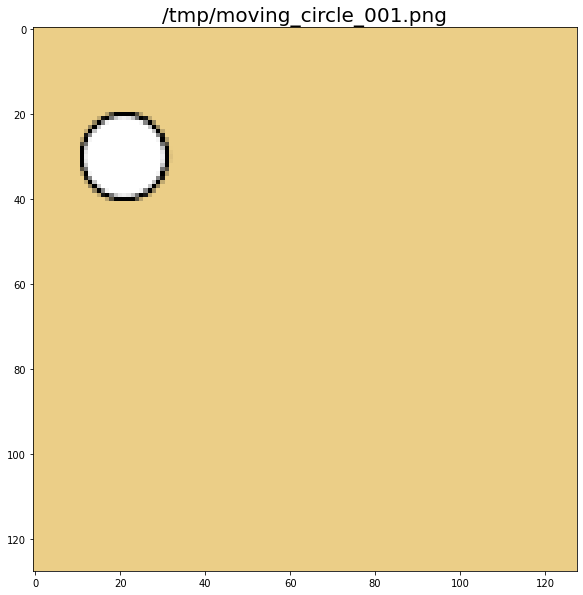

In [11]:
plt.figure(figsize=(10,10))
plt.title("/tmp/moving_circle_001.png", fontsize=20)
plt.imshow(moving_circle_000)

In [12]:
%%bash

# The images are in the RGB domain and we work in the YUV domain, so we convert them.
/home/vruiz/MRVC/tools/RGB2YUV.py -i /tmp/moving_circle_000.png -o /tmp/YUV_moving_circle_000.png
/home/vruiz/MRVC/tools/RGB2YUV.py -i /tmp/moving_circle_001.png -o /tmp/YUV_moving_circle_001.png

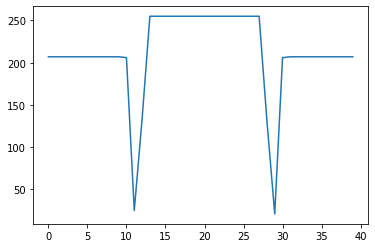

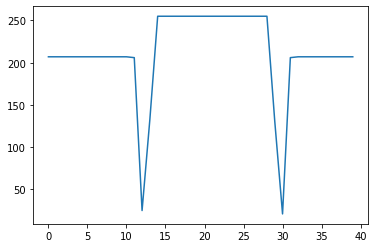

In [13]:
# Plot the first part (from pixel 0 to 39) of the horizontal line (row 35) of the luminance.
YUV_moving_circle_000 = cv2.imread("/tmp/YUV_moving_circle_000.png")
YUV_moving_circle_001 = cv2.imread("/tmp/YUV_moving_circle_001.png")
plt.plot(YUV_moving_circle_000[35, 0:40, 0])
plt.show()
plt.plot(YUV_moving_circle_001[35, 0:40, 0])
plt.show()

In [14]:
# Generate Gaussian pyramid (of 2 levels) for both images
# (https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_pyramids/py_pyramids.html)

levels = 2

G_000 = YUV_moving_circle_000[:,:,0].copy()
G_001 = YUV_moving_circle_001[:,:,0].copy()
gp_000 = [G_000]
gp_001 = [G_001]
for i in range(levels):
    G_000 = cv2.pyrDown(G_000)
    G_001 = cv2.pyrDown(G_001)
    gp_000.append(G_000)
    gp_001.append(G_001)

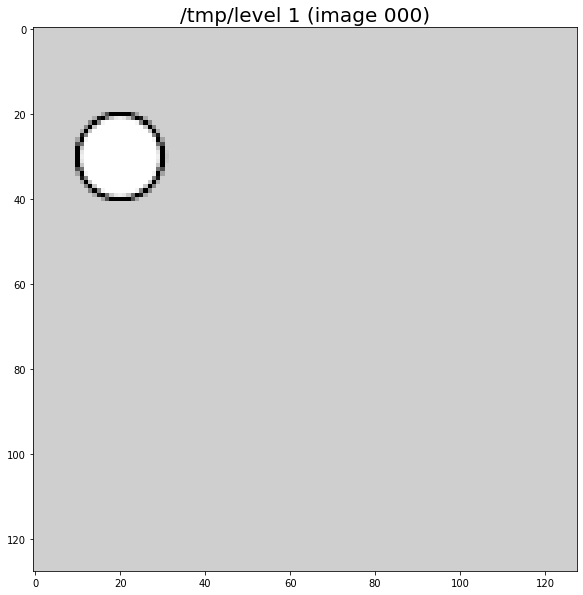

In [15]:
plt.figure(figsize=(10,10))
plt.title("/tmp/level 1 (image 000)", fontsize=20)
plt.imshow(gp_000[0], cmap="gray")

In [16]:
# Generate Laplacian Pyramid for both images.
lp_000 = [gp_000[levels-1]]
lp_001 = [gp_001[levels-1]]
for i in range(levels-1, 0, -1):
    GE_000 = cv2.pyrUp(gp_000[i])
    GE_001 = cv2.pyrUp(gp_001[i])
    L_000 = cv2.subtract(gp_000[i-1], GE_000)
    L_001 = cv2.subtract(gp_001[i-1], GE_001)
    lp_000.append(L_000)
    lp_001.append(L_001)

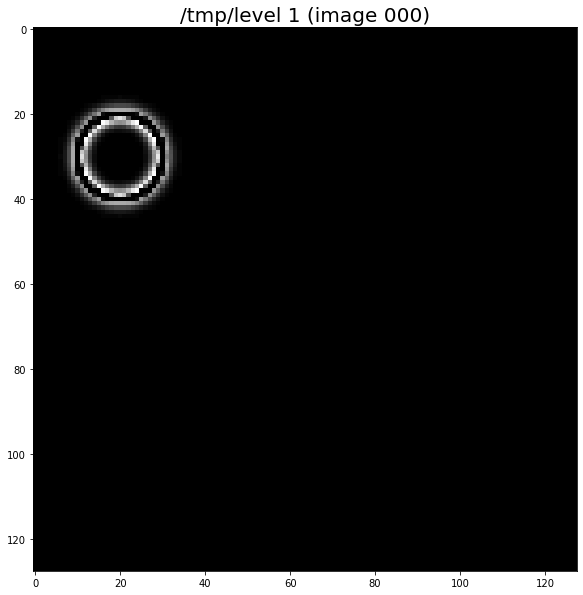

In [17]:
plt.figure(figsize=(10,10))
plt.title("/tmp/level 1 (image 000)", fontsize=20)
plt.imshow(lp_000[1], cmap="gray")

### DWT of the base of the pyramid

In [18]:
import pywt

In [21]:
LL, (LH, HL, HH) = pywt.dwt2(lp_000[1], "haar")

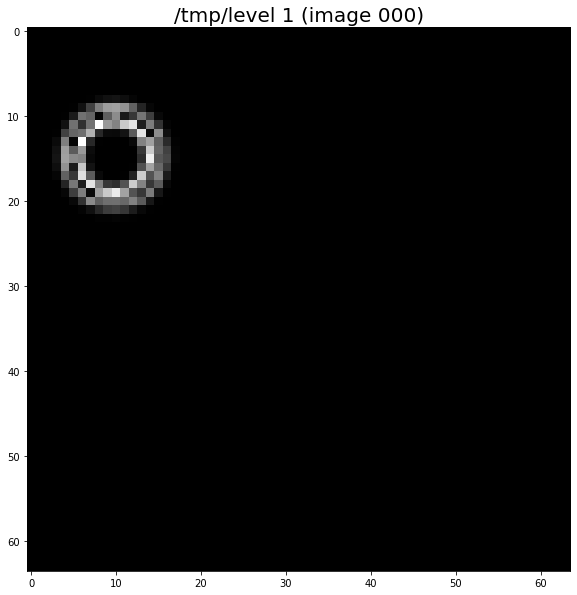

In [22]:
plt.figure(figsize=(10,10))
plt.title("/tmp/level 1 (image 000)", fontsize=20)
plt.imshow(LL, cmap="gray")

In [5]:
LL.max()

NameError: name 'LL' is not defined